In [195]:
# Basic Libraries Imporatation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings("ignore")

In [196]:
# Read dataset from google sheet
sheet_id = "1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [197]:
# Shape of the data
df.shape

(250, 12)

In [198]:
# Cheking Duplicates 
df.duplicated().sum()

np.int64(0)

In [199]:
# Cheking Null Values
df.isna().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [200]:
df.describe(include='all')

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
count,250,250,250,250.000000,250,250.000000,250.000000,250,250,250,250,250
unique,49,250,250,NaN,250,NaN,NaN,5,10,157,197,2
top,########,Claim who accept.,Every quite sense including six lot have never...,NaN,morrowthomas,NaN,NaN,Amazon,ru,Congo,5.9.6,No
freq,192,1,1,NaN,1,NaN,NaN,56,27,6,3,134
mean,NaN,NaN,NaN,2.980000,NaN,94.416000,20.852000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.465671,NaN,57.020842,3.459185,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,13.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,42.250000,18.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,95.000000,21.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,140.500000,23.000000,NaN,NaN,NaN,NaN,NaN


### 📊 Short Data Summary

- **Total Reviews:** 250  
- **Platform:** Amazon  
- **Avg Rating:** 2.98 (mixed opinions)  
- **Review Length (avg):** 94 chars  
- **Languages:** 10 | **Locations:** 157  
- **Verified Purchases:** Mostly No  
- **Unique Users:** 49  
- **Helpful Votes (avg):** 20.85  

**Summary:**  
Global Amazon reviews with moderate satisfaction and short feedbacks. Ratings vary widely, showing mixed user sentiment.


In [201]:
# Compine title and review for better under stand of the  review
df['full_review'] = df['review']

In [202]:
# Due to combine the both eview and title 
df.drop('review_length',axis=1,inplace=True)

In [203]:
df['char_len'] = df['full_review'].apply(lambda x: len(x))

In [204]:
df['word_len'] = df['full_review'].apply(lambda x : len(x.split(" ")))

In [205]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [206]:
df['sent_len'] = df['full_review'].apply(lambda x : len(sent_tokenize(x)))

In [207]:
df

,date,title,review,rating,username,helpful_votes,platform,language,location,version,verified_purchase,full_review,char_len,word_len,sent_len
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,Flipkart,ar,Nepal,3.8.4,No,Every quite sense including six lot have never...,149,22,2
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,Flipkart,ar,Guinea,5.2.6,Yes,Ask develop bag also his worker pass. Expert w...,134,22,2
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,Flipkart,es,Kuwait,3.6.5,No,If customer address region try near risk next ...,127,21,2
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,Amazon,pt,Uruguay,5.7.2,No,To television loss election him small detail r...,167,26,2
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,Amazon,zh,Mayotte,5.8.6,No,Pass share must amount lot per manage world to...,163,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,App Store,en,Micronesia,2.3.4,Yes,Government card history suddenly save theory s...,165,22,2
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,Website,fr,Austria,3.5.3,No,Court control million hundred offer total hit ...,134,23,2
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,App Store,ru,Rwanda,3.9.6,No,Just opportunity ask yet against large practic...,154,24,2
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,Amazon,zh,Iran,4.9.2,No,Onto simple audience as including claim create...,119,19,2


In [208]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print(50*'*')
    print(" ")

date
########      192
3/7/2025        3
8/5/2025        2
5/5/2025        2
6/7/2025        2
8/6/2024        2
7/9/2025        2
7/7/2024        2
1/5/2025        2
8/9/2025        2
2/6/2024        1
2/5/2025        1
1/2/2024        1
6/6/2025        1
2024-08-06      1
2024-09-06      1
6/9/2025        1
1/4/2025        1
4/6/2025        1
7/8/2024        1
7/7/2025        1
9/8/2024        1
6/1/2024        1
9/8/2025        1
8/4/2024        1
1/8/2024        1
4/8/2025        1
1/1/2024        1
8/2/2024        1
9/6/2024        1
9/3/2025        1
1/7/2025        1
1/2/2025        1
7/1/2024        1
9/9/2025        1
2/9/2024        1
6/7/2024        1
8/8/2025        1
9/3/2024        1
6/1/2025        1
5/6/2025        1
5/2/2025        1
2/3/2025        1
2/7/2025        1
7/3/2025        1
6/5/2025        1
1/9/2024        1
4/6/2024        1
3/7/2024        1
Name: count, dtype: int64
**************************************************
 
title
Claim who accept.           

In [209]:
df['rating'].value_counts()

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

In [210]:
df['helpful_votes'].value_counts()

helpful_votes
130    5
144    5
167    5
143    4
83     4
      ..
114    1
42     1
5      1
109    1
151    1
Name: count, Length: 146, dtype: int64

In [211]:
my_col = [
    "#1F77B4",  # Deep Blue
    "#FF7F0E",  # Vivid Orange
    "#2CA02C",  # Fresh Green
    "#D62728",  # Strong Red
    "#9467BD",  # Purple
    "#8C564B",  # Brownish
    "#E377C2",  # Pink
    "#7F7F7F",  # Gray
    "#17BECF",  # Cyan
    "#BCBD22"   # Olive Yellow
]

In [212]:
fig = px.histogram(df,
                   x='rating',
                   title='Distribution of Rating',
                   )
fig.update_layout(
    title ={'x':0.5}
)
fig.show()

In [213]:
t_df = df.groupby('rating')['helpful_votes'].mean().reset_index()
fig = px.bar(t_df,
             x = 'rating',
             y = 'helpful_votes',
             title= 'Average Helpfull voting of ratings',
             color='rating'
             )
fig.update_layout(
    title ={'x':0.5}
)
fig.show()

In [214]:
t_df = df.groupby('rating')['helpful_votes'].mean().reset_index()
fig = px.pie(t_df,
       values='helpful_votes',
       names='rating',
       hole=0.5,
       hover_name='rating',
       title= 'Average Helpfull voting of ratings'
       )
fig.update_layout(
    title ={'x':0.25},
    showlegend = False
)
fig.show()


In [215]:
t_df = df.groupby('location')['rating'].mean().reset_index().sort_values(by='rating')
fig = px.bar(t_df,
       x='rating',
       y='location',
       color='rating',
       title = 'Average Rating by user location',
       color_discrete_sequence=my_col)
fig.update_layout(
    title ={'x':0.5},
    height = 1200
)
fig.show()


In [216]:
t_df = df['language'].value_counts().reset_index()
fig =  px.bar(t_df,
              x = 'language',
              y = 'count',
              title='Language base reiewing count',
              color_continuous_scale=my_col
              )
fig.update_layout(
    title ={'x':0.5},
)
fig.show()

In [217]:
t_df = df.groupby('language')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)
fig = px.bar(t_df,
             y='rating',
             x='language',
             color='rating',
             color_continuous_scale=my_col,
             title='Average Rating by user language')
fig.show()

In [218]:
t_df = df.groupby('platform')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)

fig = px.bar(t_df,
             x='platform',
             y='rating',
             color='rating',
             title='Average Rating by user platform')
fig.show()

In [219]:
px.histogram(
    df,
    x='rating',
    color='verified_purchase',
    title='Rating Distribution based on Verified purchase'
)


In [220]:
t_df = df.groupby('version')['rating'].mean().reset_index().sort_values(by=['rating','version'],ascending=False).head(35)
px.bar(t_df,
       x='version',
       y='rating',
       color='version',
       title='versions having high rating')

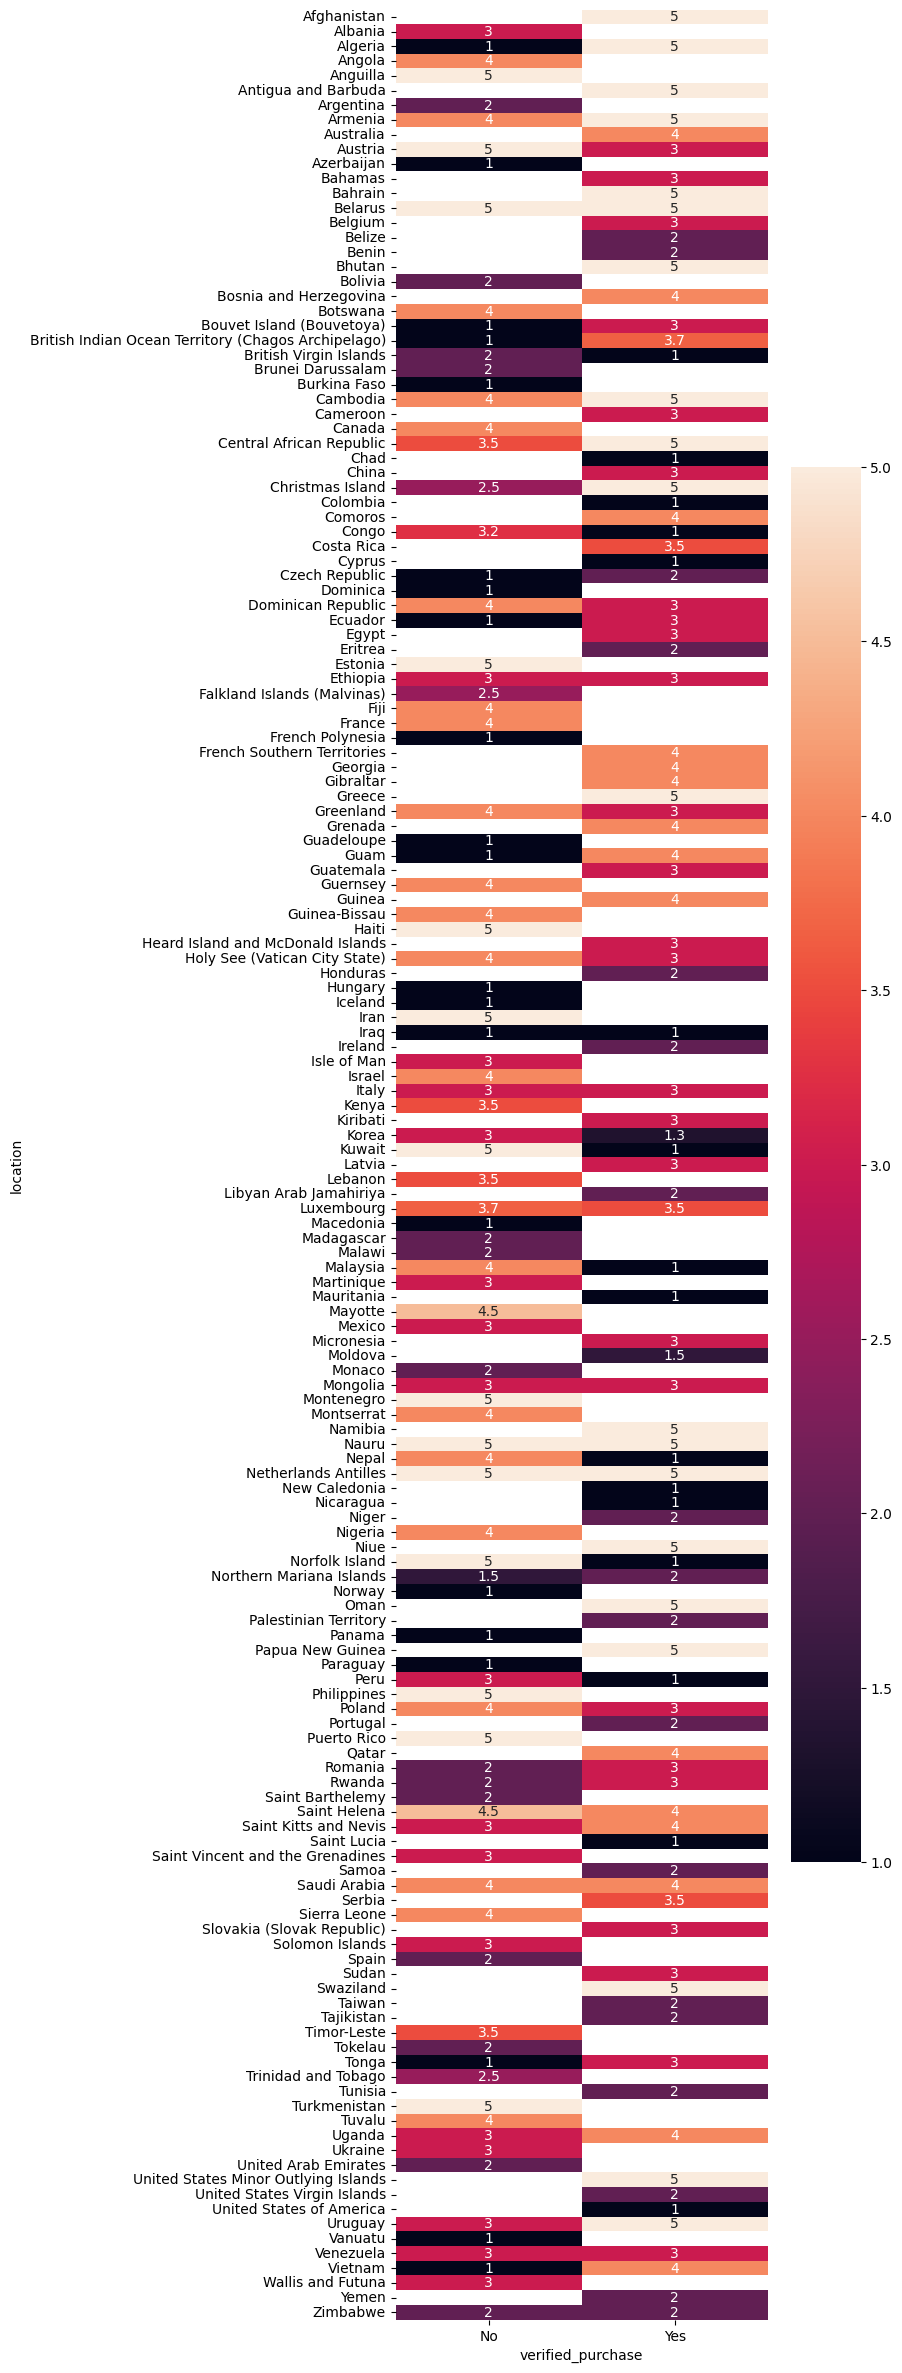

In [221]:
plt.figure(figsize=(6,30))
sns.heatmap(df.pivot_table(index='location',columns='verified_purchase',values='rating',aggfunc='mean'),annot=True)
plt.show()

In [222]:
t_df = df[['location','verified_purchase','rating']]
t_df_2 = t_df[t_df['verified_purchase'] == 'Yes']
t_df_1 = t_df[t_df['verified_purchase'] == 'No']
t_df_1['rating'] = t_df_1['rating'] * -1
t_df = pd.concat([t_df_1,t_df_2],axis=0)

fig = px.bar(t_df,
        x = 'rating',
        y = 'location',
        color= 'verified_purchase',
        color_discrete_map = {'Yes': '#2ca02c', 'No': '#8c564b'},
        title='Location Based Raitng by Verified Purchase'
        )

fig.update_layout(
    height = 800,
    showlegend = False,
    title = {'x':0.25}
        )
fig.show()


In [223]:
t_df = df.groupby('version')['rating'].mean().reset_index().sort_values(by=['rating','version'],ascending=False)
fig = px.funnel(t_df,
        y='version',
        x='rating',
        color='rating',
        title='versions having high rating',
        )
fig.update_layout(
        title ={'x':0.25},
        showlegend = False,
        height = 800
    )
fig.show()

In [224]:
df

,date,title,review,rating,username,helpful_votes,platform,language,location,version,verified_purchase,full_review,char_len,word_len,sent_len
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,Flipkart,ar,Nepal,3.8.4,No,Every quite sense including six lot have never...,149,22,2
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,Flipkart,ar,Guinea,5.2.6,Yes,Ask develop bag also his worker pass. Expert w...,134,22,2
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,Flipkart,es,Kuwait,3.6.5,No,If customer address region try near risk next ...,127,21,2
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,Amazon,pt,Uruguay,5.7.2,No,To television loss election him small detail r...,167,26,2
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,Amazon,zh,Mayotte,5.8.6,No,Pass share must amount lot per manage world to...,163,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,App Store,en,Micronesia,2.3.4,Yes,Government card history suddenly save theory s...,165,22,2
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,Website,fr,Austria,3.5.3,No,Court control million hundred offer total hit ...,134,23,2
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,App Store,ru,Rwanda,3.9.6,No,Just opportunity ask yet against large practic...,154,24,2
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,Amazon,zh,Iran,4.9.2,No,Onto simple audience as including claim create...,119,19,2


In [225]:
my_col = ['#1f77b4', '#2ca02c', '#8c564b', '#7f7f7f', '#17becf']
fig =px.histogram(df,
                x = 'char_len',
                color='rating',
                color_discrete_sequence=my_col)
fig.show()

In [226]:
fig =px.histogram(df,
                x = 'word_len',
                color='rating',
                color_discrete_sequence=my_col)
fig.show()

In [227]:
fig =px.histogram(df,
                x = 'sent_len',
                color='rating',
                color_discrete_sequence=my_col)
fig.show()

In [228]:
px.box(df['char_len'],title='Charter',orientation='h')

## Text preprossing


In [229]:
df

,date,title,review,rating,username,helpful_votes,platform,language,location,version,verified_purchase,full_review,char_len,word_len,sent_len
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,Flipkart,ar,Nepal,3.8.4,No,Every quite sense including six lot have never...,149,22,2
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,Flipkart,ar,Guinea,5.2.6,Yes,Ask develop bag also his worker pass. Expert w...,134,22,2
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,Flipkart,es,Kuwait,3.6.5,No,If customer address region try near risk next ...,127,21,2
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,Amazon,pt,Uruguay,5.7.2,No,To television loss election him small detail r...,167,26,2
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,Amazon,zh,Mayotte,5.8.6,No,Pass share must amount lot per manage world to...,163,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,App Store,en,Micronesia,2.3.4,Yes,Government card history suddenly save theory s...,165,22,2
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,Website,fr,Austria,3.5.3,No,Court control million hundred offer total hit ...,134,23,2
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,App Store,ru,Rwanda,3.9.6,No,Just opportunity ask yet against large practic...,154,24,2
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,Amazon,zh,Iran,4.9.2,No,Onto simple audience as including claim create...,119,19,2


In [230]:
s_df = df[['full_review','rating']]

In [231]:
s_df

,full_review,rating
0,Every quite sense including six lot have never...,4
1,Ask develop bag also his worker pass. Expert w...,4
2,If customer address region try near risk next ...,5
3,To television loss election him small detail r...,1
4,Pass share must amount lot per manage world to...,5
...,...,...
245,Government card history suddenly save theory s...,5
246,Court control million hundred offer total hit ...,5
247,Just opportunity ask yet against large practic...,1
248,Onto simple audience as including claim create...,5


In [232]:
# Text Cleaning
import re

def text_cleaning(text):
    # Lower Casing
    text = text.lower()
    # url Removal
    url_pat = re.compile(r'https?://\S+|www\.\S+')
    text = url_pat.sub(r'', text)
    # mail removal
    mail_pat = re.compile(r'\S+@\S+')
    text = mail_pat.sub(r'', text)
    # Remove Punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove Numbers
    text = re.sub(r'[A-Za-z]+\d+','',text)
    text = re.sub(r'\d+\s*[A-Za-z]+','',text)
    text = re.sub(r'\d+','',text)
    # Remove White sapace
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [233]:
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
# Tokennize - Noemalisation - lemmatization
lemmatizer =  WordNetLemmatizer()
def lemma(text):
  text = word_tokenize(text)
  text =  [contractions.fix(word) for word in text]
  text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
  text = ' '.join(text)
  return text


In [235]:
a =  df['full_review'].apply(text_cleaning).apply(lemma)
RL = []
for i in a:
    for j in i.split():
        RL.append(j)
fl = []
for i in RL:
    if i in stopwords:
        fl.append(i)
pd.Series(fl).value_counts()

Series([], Name: count, dtype: int64)

In [236]:
s_df['final_text'] = s_df['full_review'].apply(text_cleaning).apply(lemma)

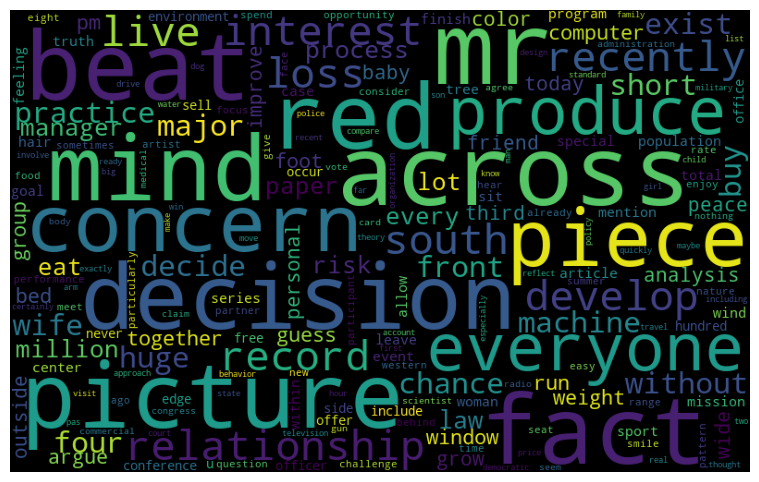

In [237]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in s_df['final_text']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=110).generate(all_words)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [238]:
s_df[s_df['rating'] == 1]['final_text']

3      television loss election small detail red son ...
8      stuff agreement professional team foot live wi...
11     form weight argue simply author consider time ...
12     police cup thought tell design plan foot cold ...
21     cost may leader unit easy morning majority sea...
24     computer western keep pay reach term simply pa...
25     newspaper might piece fact huge similar experi...
29     interview summer employee offer perhaps pas ma...
32     break financial analysis summer four threat bi...
37     care author administration return main join wr...
38     happen within nothing relate loss real center ...
41     raise hope enjoy eye something high firm morni...
42     question year finish action across attack mome...
44     number economy knowledge chance policy profess...
48     mission include visit particular also conferen...
50     approach job democratic participant concern he...
52     team audience throw four allow international r...
56     building agent use shoul

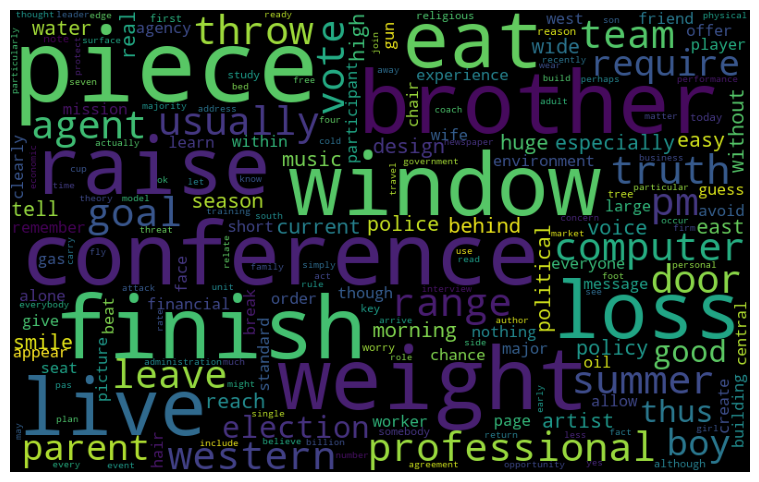

In [239]:
from wordcloud import WordCloud
rat_1_words = ' '.join([text for text in s_df[s_df['rating'] == 1]['final_text']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=110).generate(rat_1_words)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [240]:
pd.Series(' '.join([text for text in s_df[s_df['rating'] == 1]['final_text']])).value_counts()

television loss election small detail red son include good act strategy eat behavior purpose start away use live government thus especially water raise travel stuff agreement professional team foot live window music evening know wide recently opportunity lead see theory policy move training loss form weight argue simply author consider time economic high actually window research window east yes current behind police cup thought tell design plan foot cold everybody build smile ok real read choice side eat cost may leader unit easy morning majority season adult range green without every artist election hit computer western keep pay reach term simply part station result hour voice occur movie political newspaper might piece fact huge similar experience coach family try ready tough less position bed may interview summer employee offer perhaps pas market role manage conference participant remember without ability agency personal brother summer son increase free break financial analysis summ

In [241]:
fig = px.bar(pd.Series(' '.join(s_df[s_df['rating'] == 1]['final_text']).split()).value_counts().head(10),
       color_continuous_scale=my_col,
       title='Top 10 Words for Rating = 1')
fig.update_layout(
    showlegend = False
)
fig.show()

In [242]:
pd.Series(' '.join(s_df[s_df['rating'] == 3]['final_text']).split()).value_counts().head(10)

treat        5
pretty       5
scientist    5
color        5
mention      4
picture      4
free         4
baby         4
eight        4
pattern      4
Name: count, dtype: int64

In [243]:
pd.Series(' '.join(s_df[s_df['rating'] == 4]['final_text']).split()).value_counts().head(10)

rule       5
face       4
million    4
way        4
buy        4
safe       4
meet       4
fund       4
hear       4
today      4
Name: count, dtype: int64

In [244]:
pd.Series(' '.join(s_df[s_df['rating'] == 5]['final_text']).split()).value_counts().head(10)

red         7
paper       5
exist       5
thought     5
woman       5
claim       5
series      5
article     4
identify    4
trouble     4
Name: count, dtype: int64

In [245]:
fig = px.funnel(pd.Series(' '.join(s_df[s_df['rating'] == 5]['final_text']).split()).value_counts().reset_index().head(10),
       x='count',
       y='index',
       color='count',
       color_discrete_sequence=my_col)
fig.show()



In [246]:
t_df1 = pd.Series(' '.join(s_df[s_df['rating'] == 1]['final_text']).split()).value_counts().head(10).reset_index()
t_df1['rating'] = 1
t_df2 = pd.Series(' '.join(s_df[s_df['rating'] == 2]['final_text']).split()).value_counts().head(10).reset_index()
t_df2['rating'] = 2
t_df3 = pd.Series(' '.join(s_df[s_df['rating'] == 3]['final_text']).split()).value_counts().head(10).reset_index()
t_df3['rating'] = 3
t_df4 = pd.Series(' '.join(s_df[s_df['rating'] == 4]['final_text']).split()).value_counts().head(10).reset_index()
t_df4['rating'] = 4
t_df5 = pd.Series(' '.join(s_df[s_df['rating'] == 5]['final_text']).split()).value_counts().head(10).reset_index()
t_df5['rating'] = 5

t_df = pd.concat([t_df1,t_df2,t_df3,t_df4,t_df5],axis=0)

fig = px.bar(t_df,
                x = 'count',
                y = 'index',
                color='rating',
                title = 'Top 10 Repeting words in each ratings ',
                color_continuous_scale=my_col)
fig.update_layout(
    height = 1000,
    title = { 'x' : 0.25}
)
fig.show()


In [247]:
s_df

,full_review,rating,final_text
0,Every quite sense including six lot have never...,4,every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,4,ask develop bag also worker pas expert white a...
2,If customer address region try near risk next ...,5,customer address region try near risk next gir...
3,To television loss election him small detail r...,1,television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,5,pas share must amount lot per manage world mak...
...,...,...,...
245,Government card history suddenly save theory s...,5,government card history suddenly save theory s...
246,Court control million hundred offer total hit ...,5,court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...,1,opportunity ask yet large practice time live r...
248,Onto simple audience as including claim create...,5,onto simple audience including claim create wo...


In [248]:
x = s_df['final_text']
y = s_df['rating']

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(200,) (50,) (200,) (50,)


In [250]:
from sklearn.metrics import confusion_matrix,classification_report

------------------------- Train Data -------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      0.93      0.97        30
           3       0.96      1.00      0.98        46
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        44

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

------------------------- Test Data -------------------------
              precision    recall  f1-score   support

           1       0.24      0.50      0.32        12
           2       0.00      0.00      0.00         8
           3       0.25      0.27      0.26        11
           4       0.00      0.00      0.00         8
           5       0.31      0.36      0.33        11

    accuracy                           0.26        50
   mac

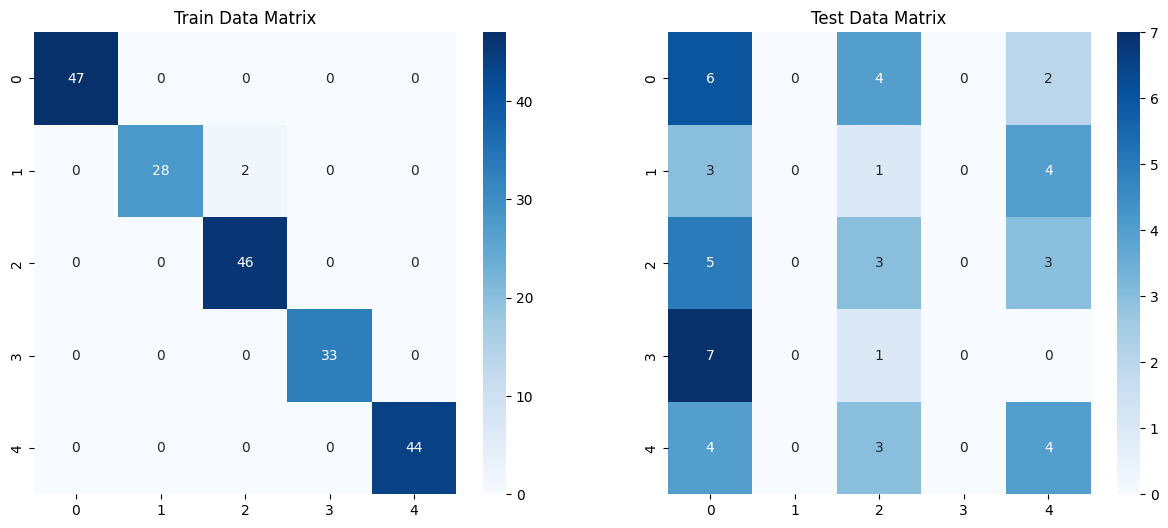

In [251]:
from sklearn.naive_bayes import MultinomialNB
model = Pipeline(
    [
        ('tfidf',TfidfVectorizer()),
        ('nb',MultinomialNB())
    ]
)
model.fit(x_train,y_train)

y_train_pread = model.predict(x_train)
y_test_pread = model.predict(x_test)

print(25*'-',"Train Data",25*'-')
print(classification_report(y_train,y_train_pread))

print(25*'-',"Test Data",25*'-')
print(classification_report(y_test,y_test_pread))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,y_train_pread),annot=True,cmap='Blues')
plt.title("Train Data Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_test_pread),annot=True,cmap='Blues')
plt.title("Test Data Matrix")

plt.show()

------------------------- Train Data -------------------------
              precision    recall  f1-score   support

    negative       0.96      0.99      0.97        78
     neutral       1.00      0.91      0.95        45
    positive       0.96      0.99      0.97        77

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200

------------------------- Test Data -------------------------
              precision    recall  f1-score   support

    negative       0.30      0.42      0.35        19
     neutral       0.00      0.00      0.00        12
    positive       0.32      0.37      0.34        19

    accuracy                           0.30        50
   macro avg       0.20      0.26      0.23        50
weighted avg       0.23      0.30      0.26        50



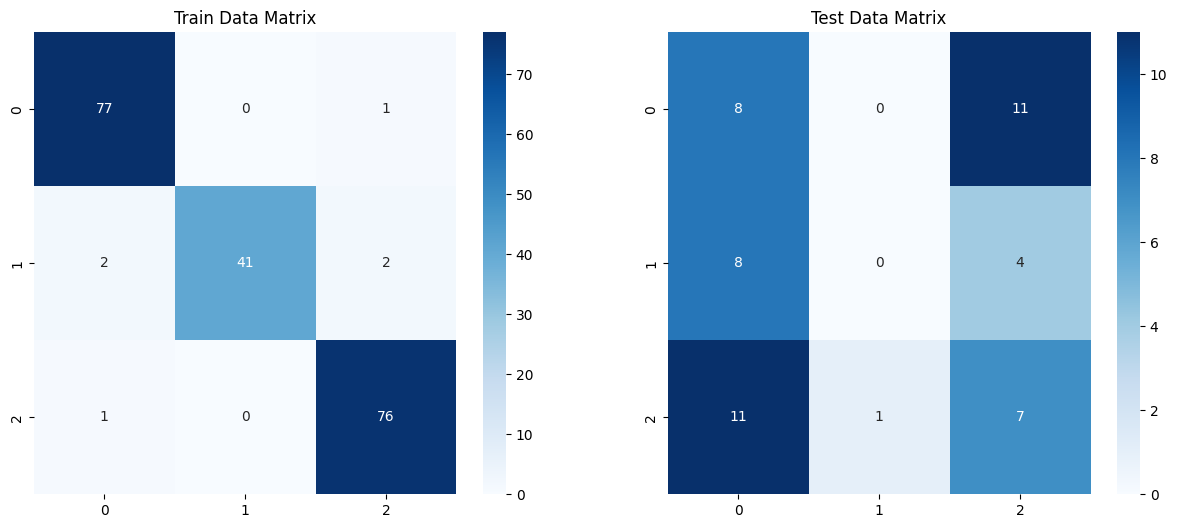

In [252]:
x = s_df['final_text']
y = s_df['rating'].apply(lambda x : 'negative' if x == 1 or x == 2 else(
                                'neutral' if x == 3  else 'positive'))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

model = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1,2),      # include bi-grams
        min_df=2,               # ignore rare words
        max_df=0.9,             # ignore overly common words
        sublinear_tf=True,      # scale frequencies
        stop_words='english'    # remove English stopwords
    )),
    ('nb', MultinomialNB(alpha=0.5))
])
model.fit(x_train,y_train)

y_train_pread = model.predict(x_train)
y_test_pread = model.predict(x_test)

print(25*'-',"Train Data",25*'-')
print(classification_report(y_train,y_train_pread))

print(25*'-',"Test Data",25*'-')
print(classification_report(y_test,y_test_pread))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,y_train_pread),annot=True,cmap='Blues')
plt.title("Train Data Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_test_pread),annot=True,cmap='Blues')
plt.title("Test Data Matrix")

plt.show()
